In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

# 주제 : 서울시 공공 자전거 대여 분석

## 1. Data Definition

In [2]:
bike = pd.read_csv("data/SeoulBikeData.csv")
bike.tail(30)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8730,29/11/2018,1577,18,0.0,46,0.9,1566,-4.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8731,29/11/2018,1026,19,5.2,48,1.9,1590,-4.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8732,29/11/2018,818,20,4.1,54,1.3,1434,-4.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8733,29/11/2018,792,21,3.8,55,2.1,1231,-4.4,0.00,0.0,0.0,Autumn,No Holiday,Yes
8734,29/11/2018,726,22,3.0,59,1.1,1218,-4.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
8735,29/11/2018,559,23,2.6,56,1.9,1394,-5.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8736,30/11/2018,474,0,1.8,62,1.6,1411,-4.7,0.00,0.0,0.0,Autumn,No Holiday,Yes
8737,30/11/2018,456,1,1.3,63,2.0,1379,-4.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8738,30/11/2018,300,2,0.6,66,0.5,1368,-5.0,0.00,0.0,0.0,Autumn,No Holiday,Yes
8739,30/11/2018,213,3,-0.1,69,0.9,1338,-5.1,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
bike.info() #bike파일 정보 읽어옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [4]:
##### quiz1. 시간대별로 평균 몇대가 대여되었을까?
bike.groupby("Hour")[["Rented Bike Count"]].mean()

,Rented Bike Count
Hour,
0,541.460274
1,426.183562
2,301.630137
3,203.331507
4,132.591781
5,139.082192
6,287.564384
7,606.005479
8,1015.701370


Text(16, 150, '퇴근')

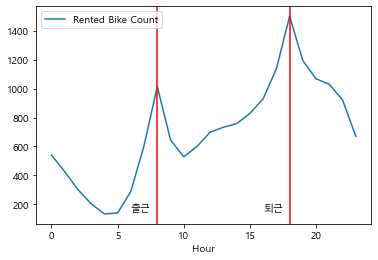

In [5]:
##### 시각화

bike.groupby("Hour")[["Rented Bike Count"]].mean().plot()

plt.axvline(x=8, color="r")
plt.axvline(x=18, color="r")
plt.text(6, 150,"출근")
plt.text(16, 150, "퇴근")

In [6]:
# Date 변수에서 요일을 뽑아 파생변수 만들기
# 2016년 1월 1일은 금요일

#년월일이 Object형식이라 날짜형식으로 바꿔주기
bike["Date"]=pd.to_datetime(bike["Date"], format="%d/%m/%Y")
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [7]:
diff = bike["Date"] - pd.to_datetime("2016-01-01")
diff = diff.astype(str)

diff_num = diff.str.split(" ", expand=True)[0].astype(int)
#expand=True : 모든 컬럼을 다 분리해준다는 의미
diff_num

def weekdays(x):
    if x % 7 == 0:
        return "금요일"
    elif x % 7 == 1 :
        return "토요일"
    elif x % 7 == 2 :
        return "일요일"
    elif x % 7 == 3 :
        return "월요일"
    elif x % 7 == 4 :
        return "화요일"
    elif x % 7 == 5 :
        return "수요일"
    elif x % 7 == 6 :
        return "목요일"

bike["weekdays"] = diff_num.apply(weekdays)
bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,금요일
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,금요일


In [8]:
bike["weekdays2"] = ((pd.to_datetime(bike["Date"], format="%d/%m/%y") - pd.to_datetime("2016-01-01")).dt.days)%7
bike["weekdays2"] = bike['weekdays2'].map({0:'금요일', 1:"토요일", 2:"일요일", 3:"월요일",4:'화요일',
                      5:'수요일', 6:'목요일'})
bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays,weekdays2
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,금요일,금요일


In [9]:
# 요일별로 평균 몇대가 대여되었을까?

bike.groupby(["weekdays"])[["Rented Bike Count"]].mean()

,Rented Bike Count
weekdays,
금요일,747.117925
목요일,690.704327
수요일,740.349359
월요일,730.563301
일요일,625.155449
토요일,709.528846
화요일,687.977564


<AxesSubplot:xlabel='weekdays', ylabel='Rented Bike Count'>

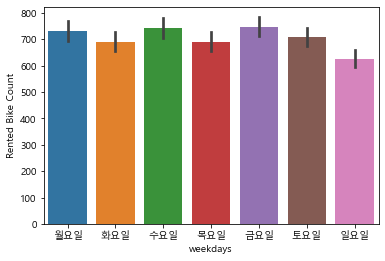

In [10]:
# 막대 그래프로 시각화

sns.barplot(x="weekdays", y="Rented Bike Count", data=bike,
           order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일'])

C:\Users\ch002\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ch002\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ch002\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ch002\anacond

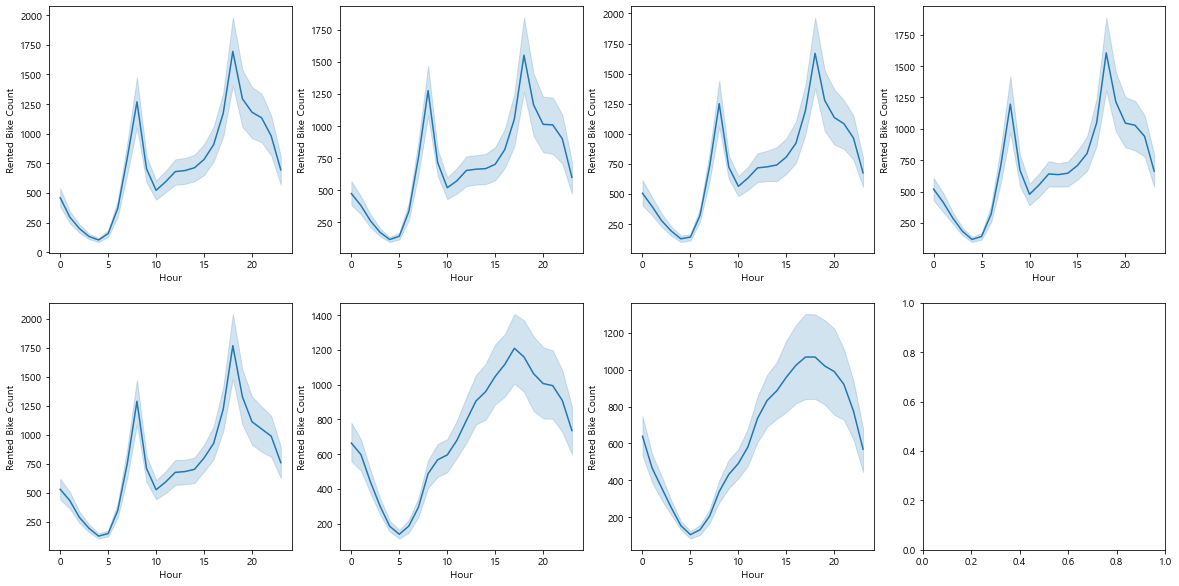

In [12]:
# 요일별로 시간대별 그래프로 시각화

f, axes = plt.subplots(2, 4, figsize=(20, 10))

weekdays_list = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
# x축은 시간
for i in range(7):
    sns.lineplot("Hour", "Rented Bike Count", data=bike.loc[bike["weekdays"]==weekdays_list[i]],
                ax=axes[i//4, i%4])
